# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

In [1]:
# The dataset collected is related to 17 campaigns that occurred between May 2008 and November 2010.
# Many features were collected and out of the over 79k samples about 8% of them are positive, 
# which makes this a very good quality dataset for classification models.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [102]:
import pandas as pd
import numpy as np
import importlib
import functions
importlib.reload(functions)

<module 'functions' from '/home/elmunoz42/aimlbootcamp/aimlbootcamp/practical-assignement-3/functions.py'>

In [103]:
df = pd.read_csv('data/bank-additional/bank-additional-full.csv', sep = ';')

In [104]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



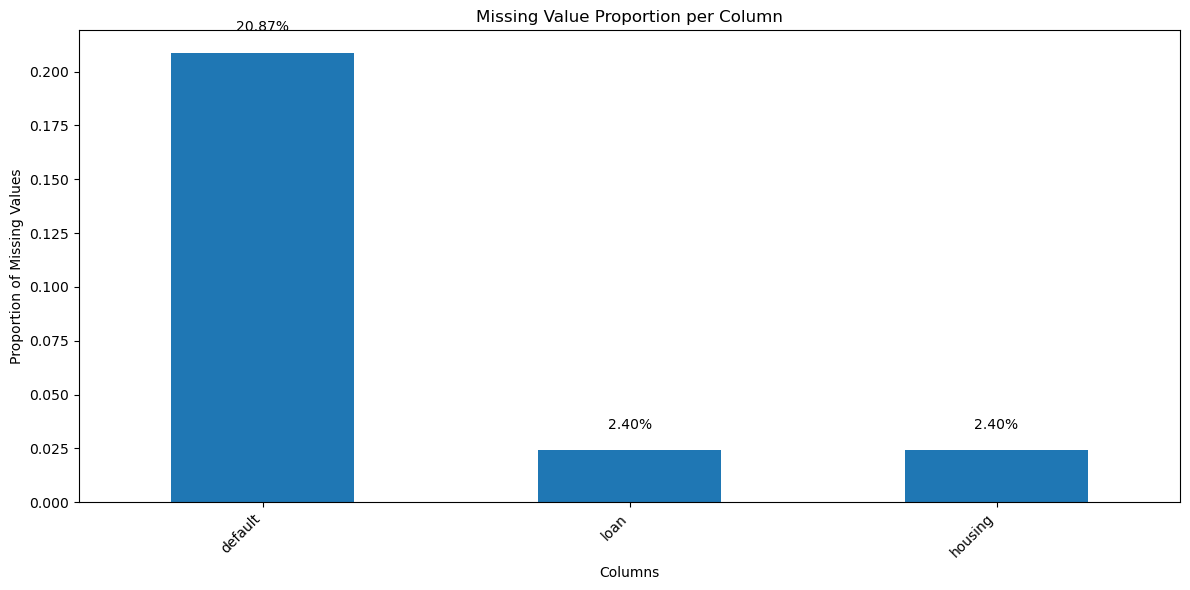

Missing value analysis saved to images/fig1.jpg
Total columns with missing values: 3
Column with most missing values: default (20.87%)


In [105]:
# Confirm that there are no missing values. Plotting function From functions.py file...
# Call the function with custom NA values
functions.plot_dataframe_missing_values(df_processed, 'images/fig1.jpg')

In [106]:
# Create a copy of the dataframe to avoid modifying the original
df_processed = df.copy()

# Transform binary yes/no features
binary_features = ['default', 'housing', 'loan', 'y']
for feature in binary_features:
    df_processed[feature] = df_processed[feature].map({'yes': 1, 'no': 0, 'unknown': np.nan})

# Check the result
df_processed[binary_features].head()

,default,housing,loan,y
0,0.0,0.0,0.0,0.0
1,NaN,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0


# Statistical Description 

## Using describe() function

In [107]:
df_processed.describe()

,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,32591.000000,40198.000000,40198.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,0.000092,0.536743,0.155431,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,0.009594,0.498654,0.362319,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,0.000000,0.000000,0.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,0.000000,1.000000,0.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,0.000000,1.000000,0.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,1.000000,1.000000,1.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


## EXPERIMENT: Using Claude API Function Against Column Descriptions and Pandas describe() Output

In [109]:
# CUstom function imported from the functions.py file
## ADD YOUR OWN API KEY
model = 'claude-3-opus-20240229'
custom_prompt = """
        You are an expert data analyst. Based on the dataset statistics provided, give me a concise, 
        human-readable interpretation of the key characteristics of this dataset. Focus on:
        
        1. The typical values and ranges for numerical columns
        2. Ignore the categorical features since you don't have data for these. DONT DESCRIBE FEATURES FOR WHICH YOU DON'T HAVE NUMBERS.
        3. Any potential issues with the data (e.g., missing values, outliers)
        4. Any interesting patterns or insights
        
        Format your response as bullet points that are easy to read and understand.
        Make your insights actionable for further data analysis and classification model development.
        """

## AFTER ADDING YOUR API KEY UNCOMMENT CODE TO RUN
# interpretation = functions.describe_dataset_with_claude(df_processed, claude_key, model='claude-3-opus-20240229', 
#                                 version='2023-06-01', custom_prompt=custom_prompt, 
#                                 column_description='', column_info_file='custom_info.txt')
# # output
# print(interpretation)

# OUTPUT ALSO SAVED TO THIS FILE FOR REVIEW: claude-statistical-analysis.txt

Here are the key characteristics of the dataset based on the provided statistics:

- Age:
  - Typical age is around 40 years old (mean: 40.02, median: 38) 
  - Most people are between 32 and 47 years old (25th to 75th percentile)
  - Age ranges from 17 to 98 years old

- Default, Housing, Loan:
  - These appear to be binary variables (0 or 1)
  - Default rate is very low (mean: 0.00009) 
  - About 54% have housing loans (mean: 0.54)
  - About 16% have personal loans (mean: 0.16)
  - There are many missing values for Default (20.9% missing)

- Duration:
  - Average call duration is 258 seconds (mean), with 50% between 102 and 319 seconds (25th to 75th percentile)
  - Durations range from 0 to 4918 seconds, indicating potential outliers on the high end

- Campaign:
  - Average number of contacts is 2.6 (mean), with 50% between 1 and 3 (25th to 75th percentile) 
  - Maximum contacts is 56, indicating potential outliers

- Previous:
  - Average number of previous contacts is low at 0.17 (m

## Claude Model Response Evaluation:

To run this yourself you'll need an API key https://console.anthropic.com/

The above technique is experimental. When I ran it at first it was hallucinating for features it didn't have any data for thus the all caps prompt "DONT DESCRIBE FEATURES FOR WHICH YOU DON'T HAVE NUMBERS." was necessary. That improved the result significantly. 

Please note that the response is slighly different each time it is run, and we have to corroborate any of its claims.

The experiment was helpful in identifying some issues. The sample output can also be reviewed in this file: claude-statistical-analysis.txt 


### _pdays_ Feature Has Hard Upper Limit Presumably Due to a Form Limitation

It does provide some further avenues for exploration and data cleaning. On a different pass it had noticed that the pdays column had a mode for the number 999 which is also the max value. 

The dataset had described:

"pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)" 

This is not entirely true since according to the data there have been over 4000 customers that had been reached out to at least once and also have the value set to 999 

In [110]:
df_processed['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

In [111]:
df_processed.query("pdays == 999")['previous'].value_counts()

0    35563
1     3696
2      349
3       50
4       12
5        2
6        1
Name: previous, dtype: int64

Based on the query to see the value counts this seems to be a limitation of the intake form. While the majority of instances of 999 pdays is people that haven't been reached out to some of them are simply people that presumably hadn't been reached out to in a long time. Thus it does indeed seem to be an artifact in the data that needs to be accounted for. More on this later.

### Further Review of Missing, Unkown and 999 Values affecting _pdays, default, housing and loan_ Features

Our experimental Claude API statistical analysis claimed these features had missing values and other issues.

In [112]:
df_processed['default'].value_counts(dropna=False)

0.0    32588
NaN     8597
1.0        3
Name: default, dtype: int64

In [113]:
df_processed['housing'].value_counts(dropna=False)

1.0    21576
0.0    18622
NaN      990
Name: housing, dtype: int64

In [114]:
df_processed['loan'].value_counts(dropna=False)

0.0    33950
1.0     6248
NaN      990
Name: loan, dtype: int64

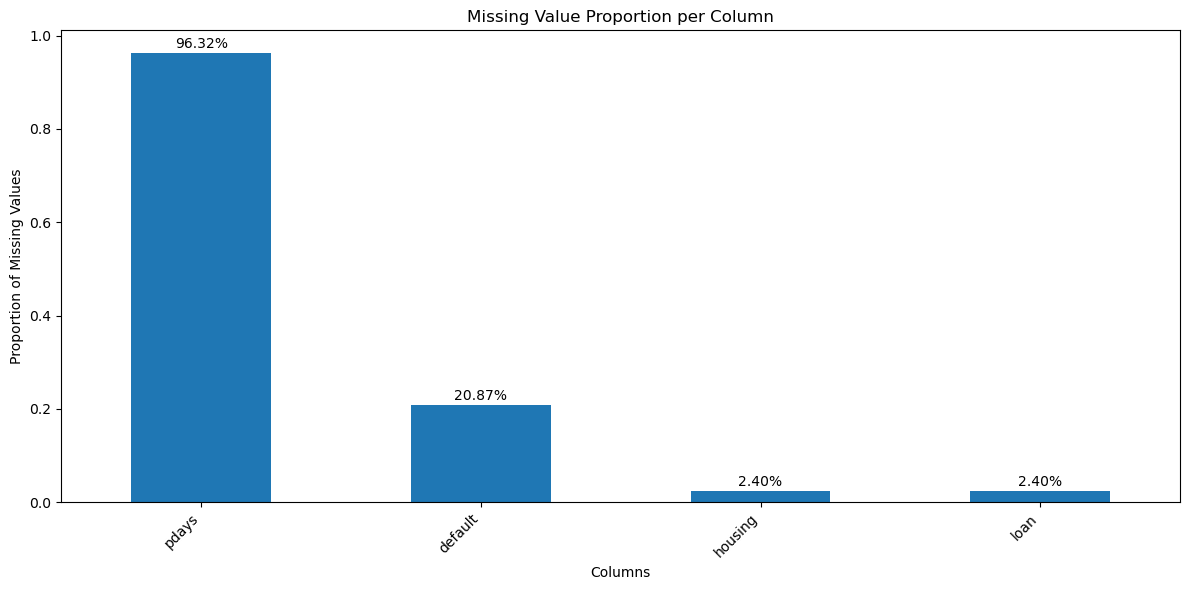

Missing value analysis saved to images/fig1B.jpg
Total columns with missing values: 4
Column with most missing values: pdays (96.32%)


In [115]:
# Review 999 or unknown entries in addition to other missing values. Plotting function From functions.py file...
# Define custom missing value indicators
custom_na = {
    'pdays': [999],  # 999 in pdays means "client was not previously contacted"
    'default': ['unknown'],
    'housing': ['unknown'],
    'loan': ['unknown']
}

# Call the function with custom NA values
functions.plot_dataframe_missing_values(df_processed, 'images/fig1B.jpg', custom_na_values=custom_na)

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [116]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         32591 non-null  float64
 5   housing         40198 non-null  float64
 6   loan            40198 non-null  float64
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The Portuguese bank is seeking to increase the number of long-term deposit subscriptions through telemarketing campaigns. Since marketing efforts are costly and can have negative effects if applied indiscriminately, the bank needs to optimize its approach. The business objective is to develop predictive models that can identify which customers are most likely to subscribe to term deposits, thereby maximizing return on investment and minimizing unnecessary contacts.
By comparing different classification models using the CRISP-DM methodology, we aim to determine which model provides the most accurate predictions. The final deliverable will include gain and lift visualization charts that will enable the bank's marketing team to identify the optimal cohort of prospects to target, allowing them to focus their efforts on customers with the highest probability of conversion while reducing overall campaign costs.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

# The pdays Feature Transformation NEEDS FIX

Since over 90% of samples had this feature hitting the artifical 999 limit, we are engineering a new ordered categorical feature called touch_point. I experimented with a few different break points, I noticed however that there was a big gap in the values between 250 or so and the 999 value. There are no values in betwee. Additionaly, since in the smaller numbers there is a lot of variation and marketing impact based on the intuition that the [Recency Effect](https://thedecisionlab.com/biases/recency-effect) might apply here. For example if someone had solicited me yesterday and then calls again the today, I would likely report that as spam. However, if someone reached out 90 days ago, and is now reaching out again that makes a big difference. To capture this type of psychological impact we are going to fan the data out into fibonaci break point ranges. Furthermore if the _previous_ column is equal to 0 then we'll mark the value as _Never_. While we could have simply used a mathematical formula due to the issue with the intake process, I'm choosing to use the categorical settings instead.


In [117]:
def create_fibonacci_touch_point_simplified(df):
    """
    Create a categorical touch_point feature based on Fibonacci-like intervals
    with simplified categories for recent contacts.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing 'pdays' and 'previous' columns
    
    Returns:
    pandas.Series: New touch_point categorical feature
    """
    # Create a copy to avoid modifying the original dataframe
    touch_point = pd.Series(index=df.index, dtype='object')
    
    # Assign "Never" if previous=0 (regardless of pdays value)
    touch_point.loc[df['previous'] == 0] = 'Never'
    
    # Create mask for previously contacted customers
    mask = df['previous'] > 0
    
    # Special case for 999 and over
    touch_point.loc[mask & (df['pdays'] >= 999)] = '999-and-over'
    
    # Early days with simpler categories
    touch_point.loc[mask & (df['pdays'] == 0)] = 'Today'
    touch_point.loc[mask & (df['pdays'] == 1)] = '1-day'
    touch_point.loc[mask & (df['pdays'] == 2)] = '2-days'
    touch_point.loc[mask & (df['pdays'] == 3)] = '3-days'
    
    # Then use Fibonacci-like progression
    touch_point.loc[mask & (df['pdays'] >= 4) & (df['pdays'] <= 5)] = '4-to-5-days'
    touch_point.loc[mask & (df['pdays'] >= 6) & (df['pdays'] <= 8)] = '6-to-8-days'
    touch_point.loc[mask & (df['pdays'] >= 9) & (df['pdays'] <= 13)] = '9-to-13-days'
    touch_point.loc[mask & (df['pdays'] >= 14) & (df['pdays'] <= 21)] = '14-to-21-days'
    touch_point.loc[mask & (df['pdays'] >= 22) & (df['pdays'] <= 34)] = '22-to-34-days'
    touch_point.loc[mask & (df['pdays'] >= 35) & (df['pdays'] <= 55)] = '35-to-55-days'
    touch_point.loc[mask & (df['pdays'] >= 56) & (df['pdays'] <= 89)] = '56-to-89-days'
    touch_point.loc[mask & (df['pdays'] >= 90) & (df['pdays'] <= 144)] = '90-to-144-days'
    touch_point.loc[mask & (df['pdays'] >= 145) & (df['pdays'] <= 233)] = '145-to-233-days'
    touch_point.loc[mask & (df['pdays'] >= 234) & (df['pdays'] <= 377)] = '234-to-377-days'
    touch_point.loc[mask & (df['pdays'] >= 378) & (df['pdays'] <= 610)] = '378-to-610-days'
    touch_point.loc[mask & (df['pdays'] >= 611) & (df['pdays'] < 999)] = '611-to-998-days'
    
    # Create ordered categories list
    ordered_categories = [
        'Never', 
        '999-and-over',
        '611-to-998-days',
        '378-to-610-days',
        '234-to-377-days',
        '145-to-233-days',
        '90-to-144-days',
        '56-to-89-days',
        '35-to-55-days',
        '22-to-34-days',
        '14-to-21-days',
        '9-to-13-days',
        '6-to-8-days',
        '4-to-5-days',
        '3-days',
        '2-days',
        '1-day',
        'Today'
    ]
    
    # Remove any categories that don't appear in the data
    existing_categories = touch_point.unique()
    ordered_categories = [cat for cat in ordered_categories if cat in existing_categories]
    
    return pd.Categorical(touch_point, categories=ordered_categories, ordered=True)

# Apply the function to your processed dataframe
df_processed['touch_point'] = create_fibonacci_touch_point_simplified(df_processed)

# Print distribution of the new feature
print(df_processed['touch_point'].value_counts(dropna=False))
print("\nPercentage distribution:")
print(df_processed['touch_point'].value_counts(normalize=True) * 100)

Never            35563
999-and-over      4110
6-to-8-days        490
3-days             439
9-to-13-days       238
4-to-5-days        164
14-to-21-days       76
2-days              61
1-day               26
Today               15
22-to-34-days        6
Name: touch_point, dtype: int64

Percentage distribution:
Never            86.343110
999-and-over      9.978635
6-to-8-days       1.189667
3-days            1.065844
9-to-13-days      0.577838
4-to-5-days       0.398174
14-to-21-days     0.184520
2-days            0.148101
1-day             0.063125
Today             0.036418
22-to-34-days     0.014567
Name: touch_point, dtype: float64


# Removing Features from the DataFrame

Now that _pdays_ has been translated into _touch_point_ the feature can be removed. 

The _default_ feature only has 3 positive cases and a large amount of 20% of NaN values, as a result we will also remove this feature from the dataframe as it won't likely help with predictions.

In [126]:
df_prepared = df_processed.drop(['pdays', 'default'], axis=1)
df_prepared.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'previous', 'poutcome',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'touch_point'],
      dtype='object')


# Feature Processing Pipeline

## Categorical Features (One-Hot Encoding)
The following categorical features will be processed using one-hot encoding:

```
job, marital, education, contact, month, day_of_week, poutcome
```

## Special Case: touch_point Feature (Ordinal Encoding)
The `touch_point` feature (derived from `pdays`) will be processed with ordinal encoding:

1. Create meaningful ordinal categories based on when the client was l. (e.g., > 90 days)

2. Assign increasing integers (e.g., 0 through 4)

## Numerical Features (Polynomial Feature Creation)
For numerical features like:
```
age, duration, campaign, previous, emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m, nr.employed
```

The pipeline will scale these features and generate polynomial features to captthe other transformations for categorical and numerical features.

## FEATURE PROCESSING --- FIBONACI NEEDS FIX

In [127]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, PolynomialFeatures

# Define column groups
categorical_cols = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week', 'poutcome']
ordinal_cols = ['touch_point']
numerical_cols = ['age', 'duration', 'campaign', 'previous', 'emp.var.rate', 
                 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Define ordinal categories for touch_point
touch_point_categories = [[
        'Never', 
        '999-and-over',
        '611-to-998-days',
        '378-to-610-days',
        '234-to-377-days',
        '145-to-233-days',
        '90-to-144-days',
        '56-to-89-days',
        '35-to-55-days',
        '22-to-34-days',
        '14-to-21-days',
        '9-to-13-days',
        '6-to-8-days',
        '4-to-5-days',
        '3-days',
        '2-days',
        '1-day',
        'Today'
    ]]
    

# Define default preprocessor (permutations of this will be used as needed)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('ord', OrdinalEncoder(categories=touch_point_categories), ordinal_cols),
        ('num', Pipeline([
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=2, include_bias=False))
        ]), numerical_cols)
    ]
)


## Complete Pipeline Structure

This updated pipeline now properly includes the ordinal encoding for the `touch_point` feature while maintaining the other transformations for categorical and numerical features. Different polynomial degrees will be used as needed.

# Full pipeline example with classifier
```
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', YourChosenClassifier())  # Replace with actual classifier
])
```

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [128]:
# train_test_split?

In [140]:
from sklearn.model_selection import train_test_split
X = df_prepared.drop('y', axis=1)
y = df_prepared['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True, stratify=y)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [144]:
# Import Libraries
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.dummy import DummyClassifier
from sklearn.metrics import mean_squared_error

In [145]:
dummy_clf = DummyClassifier().fit(X_train, y_train)
baseline_score = dummy_clf.score(X_test, y_test)

print(baseline_score)

0.8873458288821987


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [146]:
pipe_lgr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=10000, random_state=42))
])
pipe_lgr.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome']),
                                                 ('ord',
                                                  OrdinalEncoder(categories=[['Never',
                                                                              '999-and-over',
                                                                              '611-to-998-days',
                                                                              '378-to-610-days',
                                                                              '234-to-377-days',
                                                                              '145-to-233-days',
                                                                              '90-to-144-days',
                                                                              '56-to...
                                                                              '4-to-5-days',
                                                                              '3-days',
                                                                              '2-days',
                                                                              '1-day',
                                                                              'Today']]),
                                                  ['touch_point']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['age', 'duration',
                                                   'campaign', 'previous',
                                                   'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed'])])),
                ('classifier',
                 LogisticRegression(max_iter=10000, random_state=42))])

### Problem 9: Score the Model

What is the accuracy of your model?

In [149]:
train_mse_lgr = mean_squared_error(y_train, pipe_lgr.predict(X_train))
test_mse_lgr = mean_squared_error(y_test,pipe_lgr.predict(X_test))

print(f"train_mse_lgr: {train_mse_lgr}")
print(f"test_mse_lgr: {test_mse_lgr}")

train_mse_lgr: 0.08581787575669289
test_mse_lgr: 0.08439351267359425


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

##### Questions